<a href="https://colab.research.google.com/github/ptripathi/NLP/blob/master/corpus_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import codecs

with codecs.open('/content/gdrive/My Drive/W266/Project/data/parallel/IITB.en-hi.hi', encoding='utf-8') as f:
    data_hi = f.read()

with codecs.open('/content/gdrive/My Drive/W266/Project/data/parallel/IITB.en-hi.en', encoding='utf-8') as f:
    data_en = f.read()

In [3]:
en_rows=data_en.split("\n")
hi_rows=data_hi.split("\n")
(len(hi_rows),len(en_rows))

(1561841, 1561841)

In [0]:
en_lengths = {}
hi_lengths = {}

In [0]:
for line in hi_rows:
  sent_len = len(line.split(' '))
  if (hi_lengths.__contains__(sent_len)):
    hi_lengths[sent_len] = int(hi_lengths.get(sent_len))+1
  else:
    hi_lengths[sent_len] = 1
  

In [0]:
for line in en_rows:
  sent_len = len(line.split(' '))
  if (en_lengths.__contains__(sent_len)):
    en_lengths[sent_len] = int(en_lengths.get(sent_len))+1
  else:
    en_lengths[sent_len] = 1

In [0]:
sorted_hi = sorted([[length, counts] for length, counts in hi_lengths.items()], key = lambda x: x[0])
sorted_en = sorted([[length, counts] for length, counts in en_lengths.items()], key = lambda x: x[0])


In [16]:
# Print percentage of sentences that have length < 15
h_counts_pct = [x[1]/len(hi_rows) for x in sorted_hi]
e_counts_pct = [x[1]/len(en_rows) for x in sorted_en]

print("Hindi", sum(h_counts_pct[:15]), h_counts_pct[:15])
print("English", sum(e_counts_pct[:15]), e_counts_pct[:15])

Hindi 0.6674904807851761 [0.16787432267433114, 0.09035490808603437, 0.050892504422665304, 0.03937468666784903, 0.034230116894101256, 0.03142317303746028, 0.03110495882743506, 0.030877022693091036, 0.03021818482163037, 0.030951294017764933, 0.02903944767745244, 0.02746886526861569, 0.026422023752737955, 0.024452553108799166, 0.022806418835207936]
English 0.7043969264476986 [0.17414448717891257, 0.1017453121028325, 0.0583977498349704, 0.040178225568415736, 0.035027893364305326, 0.0344561322183244, 0.034340243341031515, 0.03385619919057062, 0.03231442893354701, 0.030932085916556166, 0.029737982291411225, 0.02756234469449835, 0.025762545611236996, 0.024051103793535963, 0.02189019240754981]


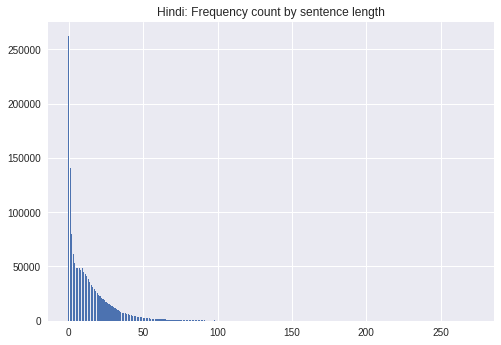

In [9]:
import matplotlib.pyplot as plt
lens = [x[0] for x in sorted_hi]
counts = [x[1] for x in sorted_hi]

plt.bar(range(len(hi_lengths)), counts, align = 'center')
plt.title('Hindi: Frequency count by sentence length')
plt.show()

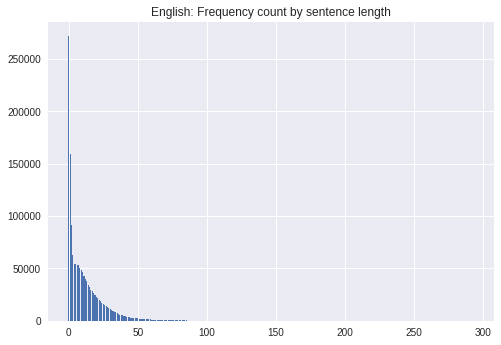

In [10]:
import matplotlib.pyplot as plt
lens = [x[0] for x in sorted_en]
counts = [x[1] for x in sorted_en]

plt.bar(range(len(en_lengths)), counts, align = 'center')
plt.title('English: Frequency count by sentence length')
plt.show()

In [0]:
from collections import Counter
en_vocab_dict = Counter(word.strip(',.%" ;:)(][?!') for sentence in en_rows for word in sentence.split())
hi_vocab_dict = Counter(
    word.strip(',.%" ;:)(।|][?!<>a-zA-Z') for sentence in hi_rows for word in sentence.split())

en_vocab = list(map(lambda x: x[0], sorted(en_vocab_dict.items(), key=lambda x: -x[1])))
hi_vocab = list(map(lambda x: x[0], sorted(hi_vocab_dict.items(), key=lambda x: -x[1])))

In [12]:
print("Hindi vocab size:", len(hi_vocab), " || English vocab size:", len(en_vocab))

Hindi vocab size: 435842  || English vocab size: 286561
